# Compare SCF/SWE relationships to observations + Machine Learning

## Observation
**Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1** (https://nsidc.org/data/NSIDC-0321/versions/1)

See more:
- https://github.com/mickaellalande/PhD/blob/master/Observations/NSIDC/nsidc0321_blended_ssmi_modis/scf_swe.ipynb
- https://github.com/mickaellalande/PhD/blob/master/Observations/NSIDC/nsidc0321_blended_ssmi_modis/nsidc0321_blended_ssmi_modis.ipynb

Mountainous areas with large topographic variability return **low mean SWE values**. Brightness temperatures in these areas may include mixed emission from deep snow on north-facing slopes, snow-free south-facing slopes, wind-scoured Alpine areas, etc.

## Snow Water Equivalent (SWE), snow density ($\rho_{snow}$), snow depth (d) relationship
$$
SWE 
= 
d \cdot \frac{
    \rho_{\text{snow}}
}{
    \rho_{\text{water}}
} \ [\text{m}] 
\simeq 
d \cdot \rho_{\text{snow}} \ [\text{mm or kg} \cdot \text{m}^{-2}]
$$

$$
\rho_{\text{water}} 
= 
997 \ \text{kg} \cdot \text{m}^{-3} 
\simeq 
1000 \ \text{kg} \cdot \text{m}^{-3}
$$

## Parameterizations

- [Niu and Yang (2007)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2007JD008674): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007.ipynb


$$
SCF 
= 
\tanh \frac{
    d
}{
    2.5 \cdot z_{0g} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}}} 
    \right)^{m}
}
=
\tanh \frac{
    50 \cdot d
}{
    0.025 \cdot \rho_{\text{snow}}
} \ (\text{in Orchidée}) 
= 
\tanh \frac{
    SWE
}{
    2.5 \cdot z_{0g} \cdot \rho_{\text{snow}} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}}}
    \right)^{m}
}
$$

> - **In Orchidée for $frac_{\text{snow,veg}}$** (https://orchidas.lsce.ipsl.fr/dev/albedo/):    
>  - $z_{0g} = 0.01$ (ground roughness length)  
>  - $\rho_{\text{new}} = 50 \text{ kg} \cdot \text{m}^{-3}$ (density of the new snow, 100 in NY07)  
>  - $m = 1$ (empirical constant)
>
> - **Orchidée snow scheme**: [Wang et al. (2013)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/jgrd.50395)

![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d1b86a4-f80b-467f-b660-ead9b7f3f6ba/jgrd13940-fig-0002.png)

- [Niu and Yang (2007)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2007JD008674) modified ([LMDZOR-STD-NY07-CUSTOM-200](https://github.com/mickaellalande/PhD/blob/master/Jean-Zay/SCA_parameterization/LMDZOR-STD-NY07-CUSTOM-200/NY07-CUSTOM-200_REF.ipynb)): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007-std.ipynb

$$
SCF 
= 
\tanh \frac{
    50 \cdot d
}{
    0.025 \cdot \rho_{\text{snow}} \cdot
    \left(
        1 + \frac{ \sigma_{topo} }{ 200 }
    \right)
}
= 
\tanh \frac{
    SWE
}{
    2.5 \cdot z_{0g} \cdot \rho_{\text{snow}} \cdot 
    \left(
        \frac{ \rho_{\text{snow}} }{ \rho_{\text{new}} } 
    \right)^{m} \cdot
    \left(
        1 + \frac{ \sigma_{topo} }{ 200 }
    \right)
} 
$$

- [Swenson and Lawrence (2012)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JD018178) simplified (only depletion curve): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Swenson2012.ipynb

 - Accumulation Events

   N is an accumulation event
   
   $$
   SCF_{N+1} = 1 - (1 - s_{N+1})(1-SCF_N)
   $$
   
   where $$ s = min(1, k \cdot SWE) $$ (k is a scale factor set to 0.1)
   
   ![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d260383-415c-41e1-8803-88666f91d937/jgrd18192-fig-0007.png)

 - Depletion Curve
 
    $$
    SCF
    =
    1 - \left[
      \frac{1}{\pi} \cdot \operatorname{acos} \left(
        2 \cdot \frac{ SWE }{ SWE_{\max } } - 1
      \right)
    \right]^{N_{\text{melt}}}
    $$

    $$
    N_{\text{melt}} = \frac{ 200 }{ \sigma_{\text{topo}} }
    $$
    
    $$
    SWE_{\text{max}}
    =
    SWE \cdot \left[
      \frac{
        \cos \left( \pi \cdot (1 - SCF) \right) + 1
      }{
        2
      }
    \right]^{
        - \frac{ 1 }{ N_{\text{melt}} } 
    } \ \text{(evaluated after the accumlulation event)}
    $$
    
    Sacré doute par rapport à leur formule... de mon côté j'obtiens :
    
    $$ 
    SWE_{\text{max}}
    =
    \frac{
        2 \cdot SWE 
    }{
        1 + \cos \left[ 
            \pi \cdot \left( 1 - SCF \right)^{
                \frac{ 1 }{ N_{\text{melt}} }
            } 
        \right]
    }
    $$
   
   ![](https://agupubs.onlinelibrary.wiley.com/cms/asset/350ead8d-acce-4457-9b45-768f40cd9b4e/jgrd18192-fig-0009.png)

- [Roesch et al. (2001)](https://link.springer.com/article/10.1007%2Fs003820100153) simplified (only moutaineous area without forest): https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Roesch2001.ipynb

$$
f_{s}=0.95 \cdot \tanh \left(100 \cdot S_{n}\right) \sqrt{\frac{1000 \cdot S_{n}}{1000 \cdot S_{n}+\epsilon+0.15 \sigma_{z}}}
$$


## Data access on CICLAD
Path on CICLAD: `/data/mlalande/NSIDC/nsidc0321_blended_ssmi_modis/`

## Python environment
conda env: new `phd_ml_v0` (in `envs/phd`)

# Import modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
sys.path.insert(1, '/home/lalandmi/Dropbox/Thèse/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]


In [2]:
xr.__version__

'0.16.1'

# Define paths

In [2]:
# CICLAD
# path = '/data/mlalande/NSIDC/nsidc0321_blended_ssmi_modis/'

# Local
path = '/home/lalandmi/data/nsidc0321_blended_ssmi_modis/'

# Get data

In [3]:
ds = xr.open_mfdataset(path+'/north/NL.*.nsidc0321v01.nc', combine='by_coords')

In [4]:
# ds

In [5]:
scf_with_mask = ds.SCA
swe_with_mask = ds.SWE

In [6]:
# scf_with_mask
# swe_with_mask

### SCF
 0          : no snow  
 1 to 100   : percent MODIS snow-covered area  
 -175       : no SCA, due to to cloud/fill/night  
 -200       : fixed value for corners  
 -250       : ocean  
 -300       : permanent ice sheets and large glaciers

### SWE
 \> 0       : SWE from deep microwave algorithm for 8-day period  
 0          : no snow  
 -100 to -1 : -1 * SWE from shallow microwave algorithm  
 -150       : missing microwave brightness temperatures  
 -200       : fixed value for corners  
 -250       : ocean  
 -300       : permanent ice sheets and large glaciers  
 -350       : no microwave SWE, but visible SCA > 25%

In [7]:
scf = scf_with_mask.where( (scf_with_mask >= 0) & (scf_with_mask <= 100) )

swe = swe_with_mask.where(swe_with_mask >= 0)
swe_from_mw_algo = -1 * swe_with_mask.where( (swe_with_mask >= -100) & (swe_with_mask <= -1) )

## Get std of topography at 25 km
http://www.temis.nl/data/gmted2010/

In [8]:
gmted = xr.open_dataset('/home/lalandmi/data/GMTED2010/GMTED2010_15n060_0250deg.nc')

In [9]:
std = gmted \
    .assign_coords({'nlat': gmted.latitude, 'nlon': gmted.longitude}) \
    .rename({'nlat': 'lat', 'nlon': 'lon'}) \
    .elevation_stddev

# Regrid on topo

In [10]:
scf_regrid = u.regrid(scf.rename({'longitude': 'lon', 'latitude': 'lat'}), std, 
                      globe=False, periodic=False)

Reuse existing file: bilinear_721x721_720x1440.nc


/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


In [11]:
swe_regrid = u.regrid(swe.rename({'longitude': 'lon', 'latitude': 'lat'}), std, 
                      globe=False, periodic=False)

/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Reuse existing file: bilinear_721x721_720x1440.nc


/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


# Load data (/!\ 6Go /!\\)
Otherwise ignore this cell but it will be longer to make plots

In [13]:
swe_regrid.load()
scf_regrid.load()

<xarray.DataArray 'SCA' (time: 355, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-03-05 2000-03-13 ... 2008-01-17
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
Attributes:
    regrid_method:        bilinear
    standard_name:        surface_snow_area_fraction
    grid_mapping:         projection
    ancillary_variables:  scaInfo
    flag_meanings:        \nno_SCA_due_to_cloud_fill_night \ngrid_corners \no...
    flag_values:          [-175 -200 -250 -300]
    information:          \n 0          : no snow\n 1 to 100   : percent MODI...
    units:                %
    long_name:            MODIS snow-covered area (SCA)

# Plot SCF/SWE relationship
Reproduce Figure 2 of Niu and Yang (2007) with monthly values

![](https://agupubs.onlinelibrary.wiley.com/cms/asset/9d1b86a4-f80b-467f-b660-ead9b7f3f6ba/jgrd13940-fig-0002.png)

NY07
NY07_STD
SL12


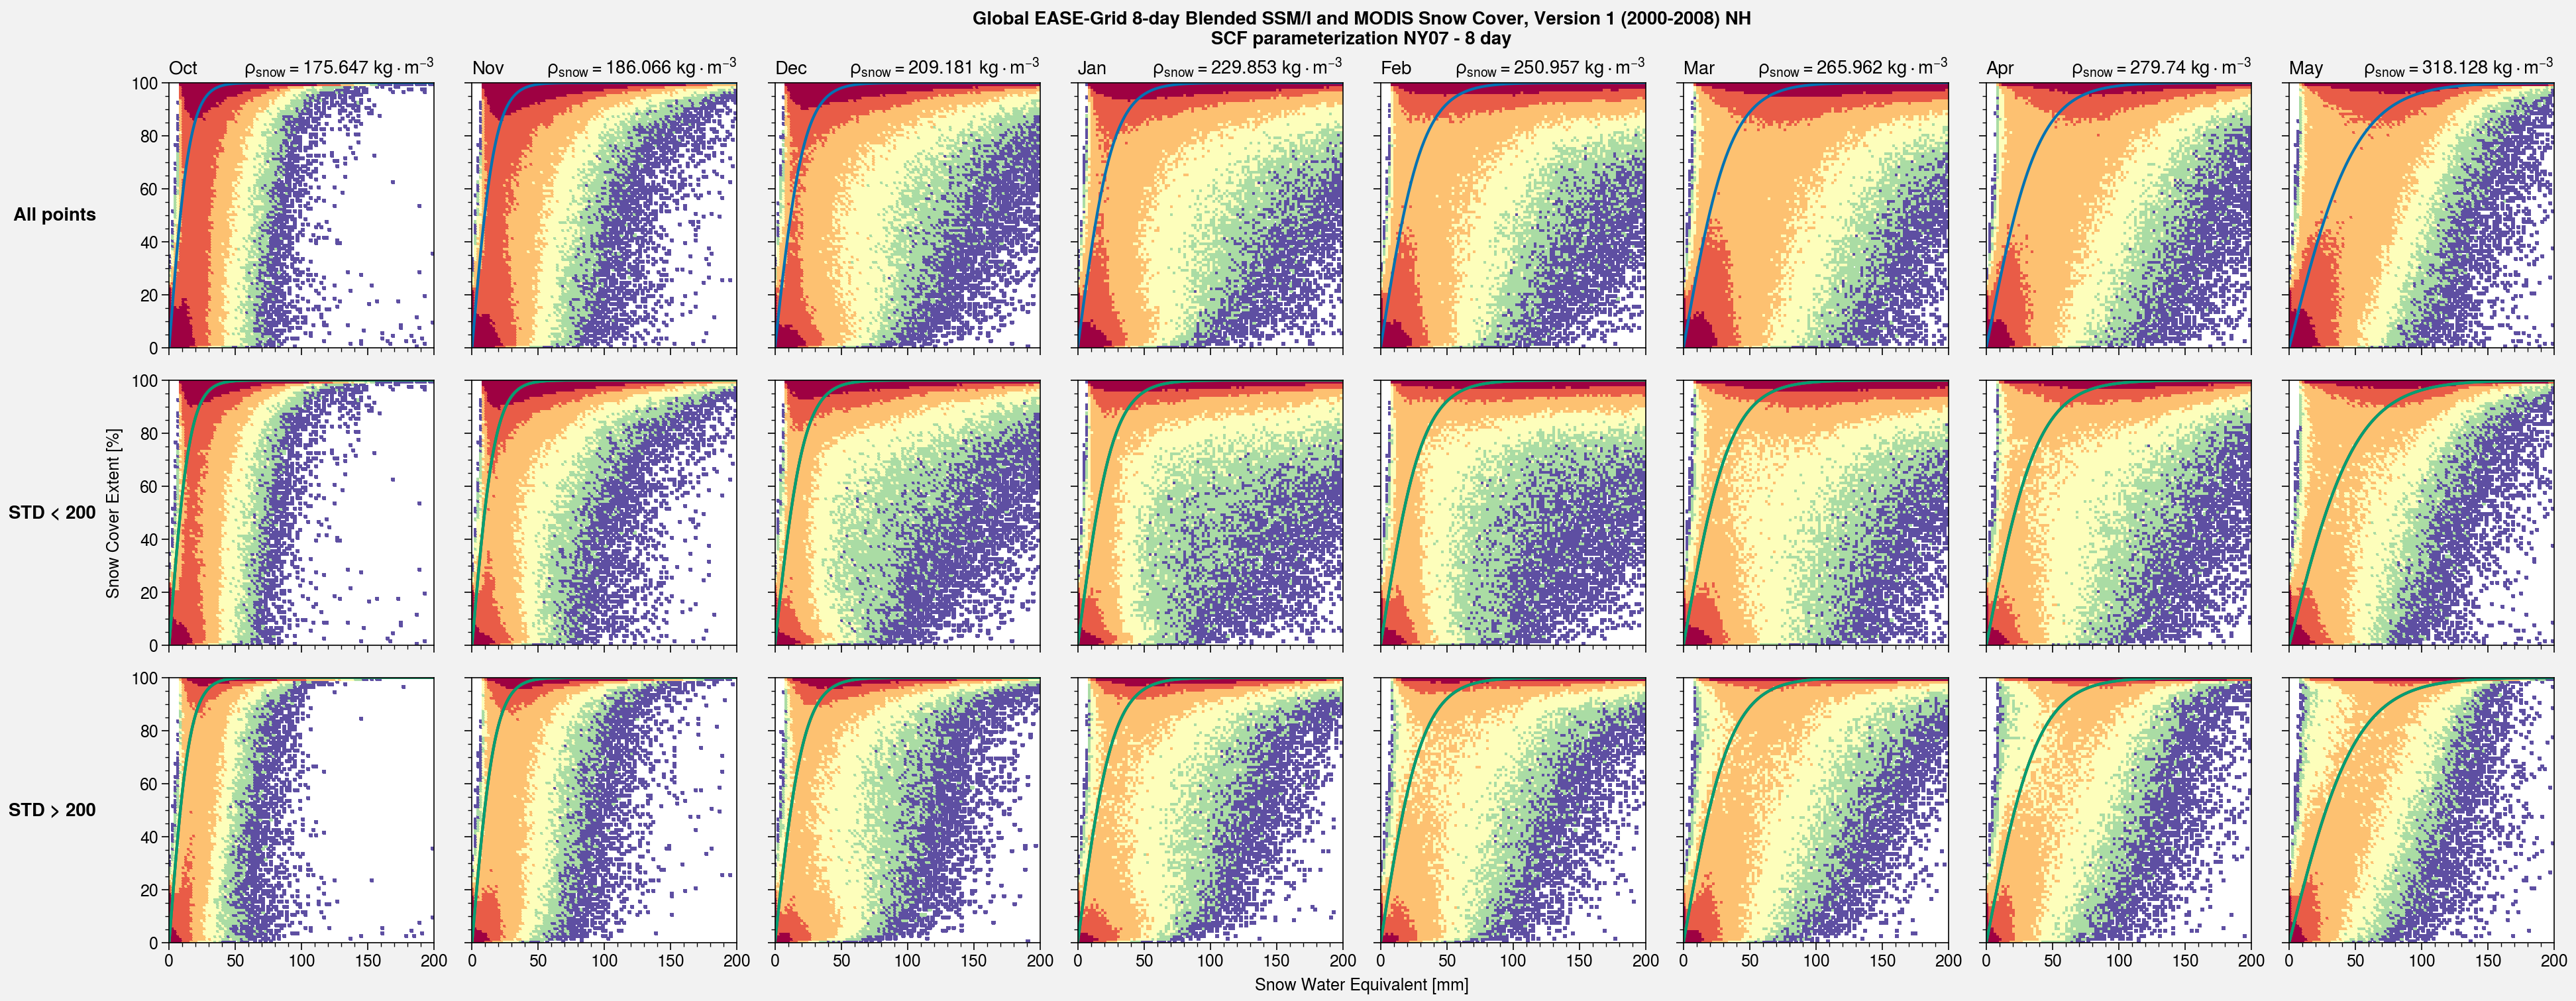

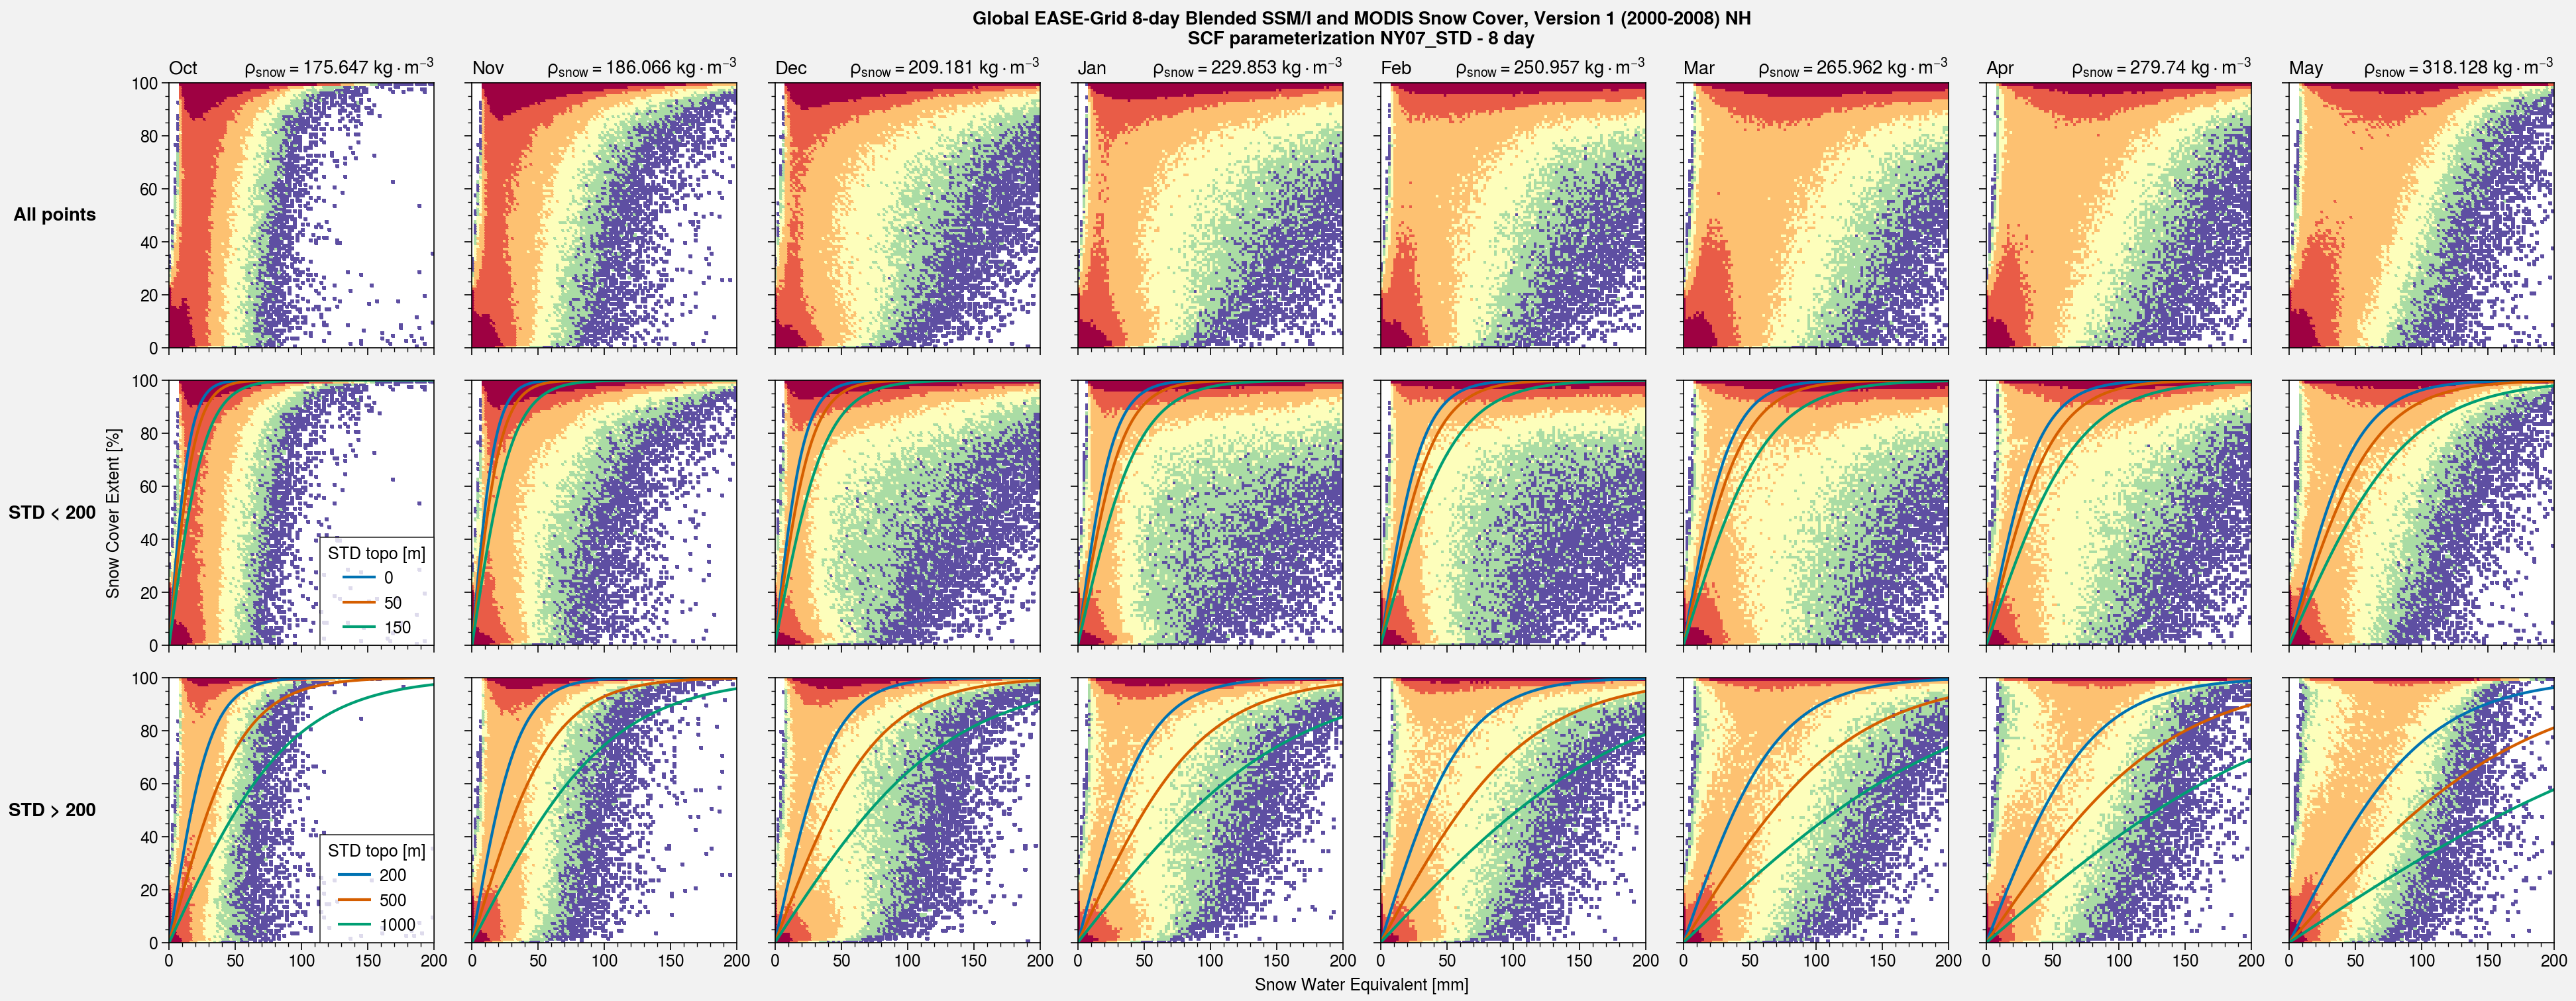

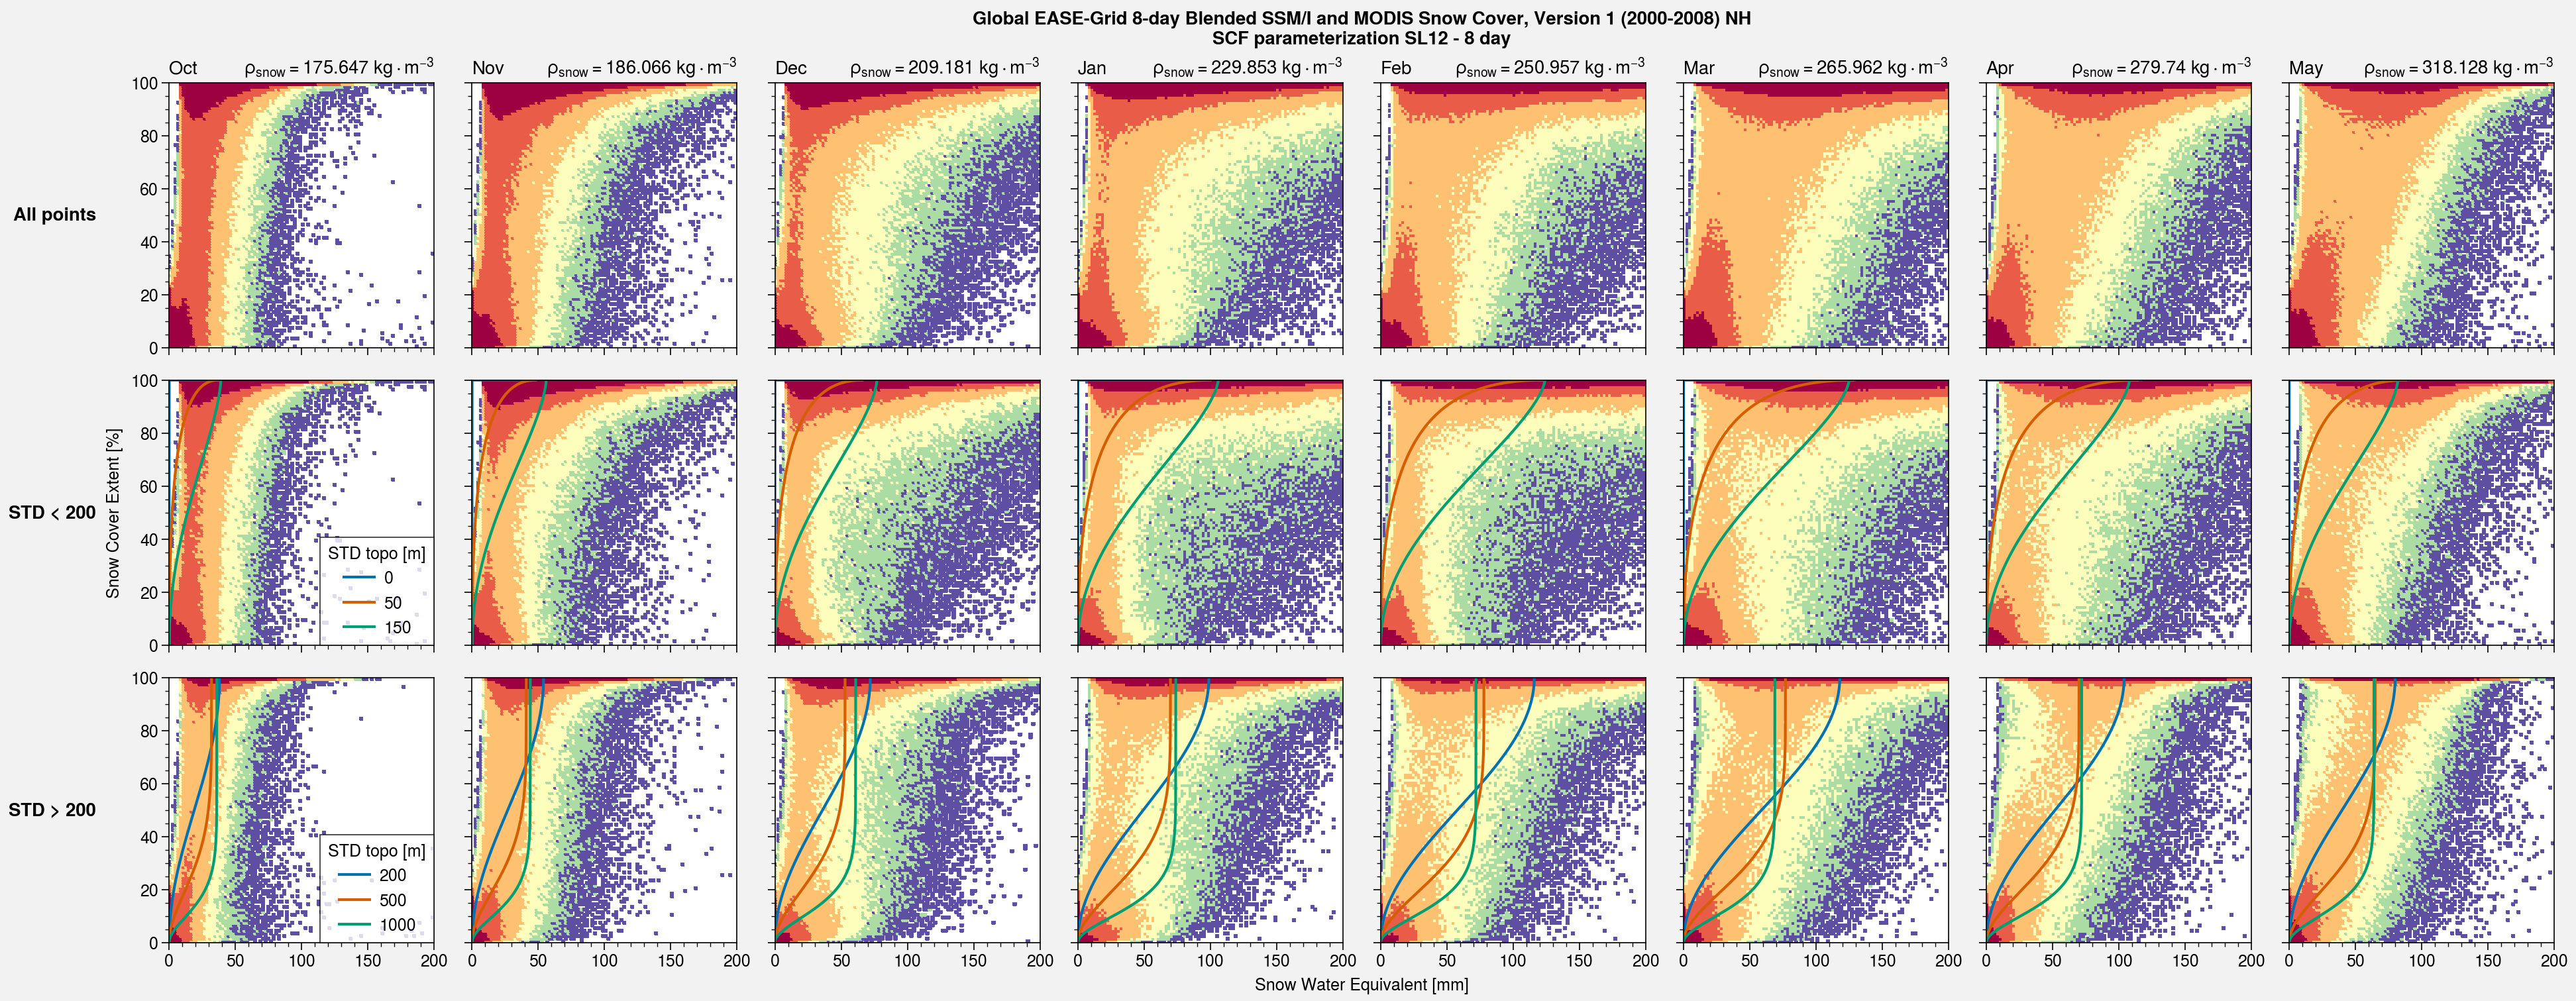

In [112]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])
monthly_rho_snow = np.array([
    175.647, 186.066, 209.181, 229.853,
    250.957, 265.962, 279.74, 318.128
])
lim_std = 200
SWE_max = 200

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 1)
rho_snow_list = plot.arange(100, 400, 100)

for param in ['NY07', 'NY07_STD', 'SL12']:
# for param in ['SL12']:
    print(param)

    for domain in ['NH']:
        latlim, lonlim = u.get_zone(domain)

        # Figure
        fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)
        
        k = 0
        
        # All points
        for i, month in enumerate(months):
            axs[k].hist2d(
                swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True).values.flatten(), 
                scf_regrid.sel(lat=latlim, lon=lonlim).where(scf_regrid['time.month'] == month, drop=True).values.flatten(), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
    
            if param in ['NY07']:
                x = SWE
                y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i])
                axs[k].plot(x, y)

            axs[k].format(
                ltitle=calendar.month_abbr[month],
                rtitle=r'$\rho_{snow} = $' + str(monthly_rho_snow[i]) + ' $kg \cdot m^{-3}$'
            )

            k += 1
        
        # STD > and < to 200
        for cond, sigma_topo_list in zip(
            [(std < lim_std), (std > lim_std)],
            [[0, 50, 150], [200, 500, 1000]]
        ):
            for i, month in enumerate(months):
#                 print(calendar.month_name[month])
                axs[k].hist2d(
                    swe_regrid.sel(lat=latlim, lon=lonlim).where(
                        (swe_regrid['time.month'] == month) & cond, drop=True).values.flatten(), 
                    scf_regrid.sel(lat=latlim, lon=lonlim).where(
                        (scf_regrid['time.month'] == month) & cond, drop=True).values.flatten(), 
                    bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
                )

                hs = []
                for sigma_topo in sigma_topo_list:
                    x = SWE
                    if param in ['NY07_STD']:
                        y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i], sigma_topo=sigma_topo)
                    elif param in ['SL12']:
                        # Compute the mean SWE to show in average where the curve starts from around sigma_topo
                        SWE_mean = int(swe_regrid.sel(lat=latlim, lon=lonlim).where(
                            (swe_regrid['time.month'] == month) & 
                            (std > sigma_topo-50) & (std < sigma_topo+50) & 
                            (scf_regrid > 50), 
                            drop=True
                        ).mean().values)
                        x = plot.arange(0, SWE_mean, 0.1)
                        y = u.scf(param=param, SWE=x, sigma_topo=sigma_topo, SWE_max=SWE_mean)
                    else:
                        y = u.scf(param=param, SWE=SWE, rho_snow=monthly_rho_snow[i])
                    h = axs[k].plot(x, y, label=sigma_topo)
                    hs.append(h)
                if (i == 0) & (param not in ['NY07']): axs[k].legend(hs, label='STD topo [m]', ncols=1, loc='lr')
                k += 1        
        
        axs.format(
            rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
            xlabel='Snow Water Equivalent [mm]',
            ylabel='Snow Cover Extent [%]',
            suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                     '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                     'SCF parameterization '+param+' - 8 day'
        )

#         filename = 'EASE-Grid_SCF-SWE_Oct-May_'+domain+'_'+param
#         for ext in ['jpg', 'png', 'pdf']:
#             fig.save('img/'+filename+'.'+ext)

# Swenson and Lawrence (2012)
Only depletion curve + relative SWE

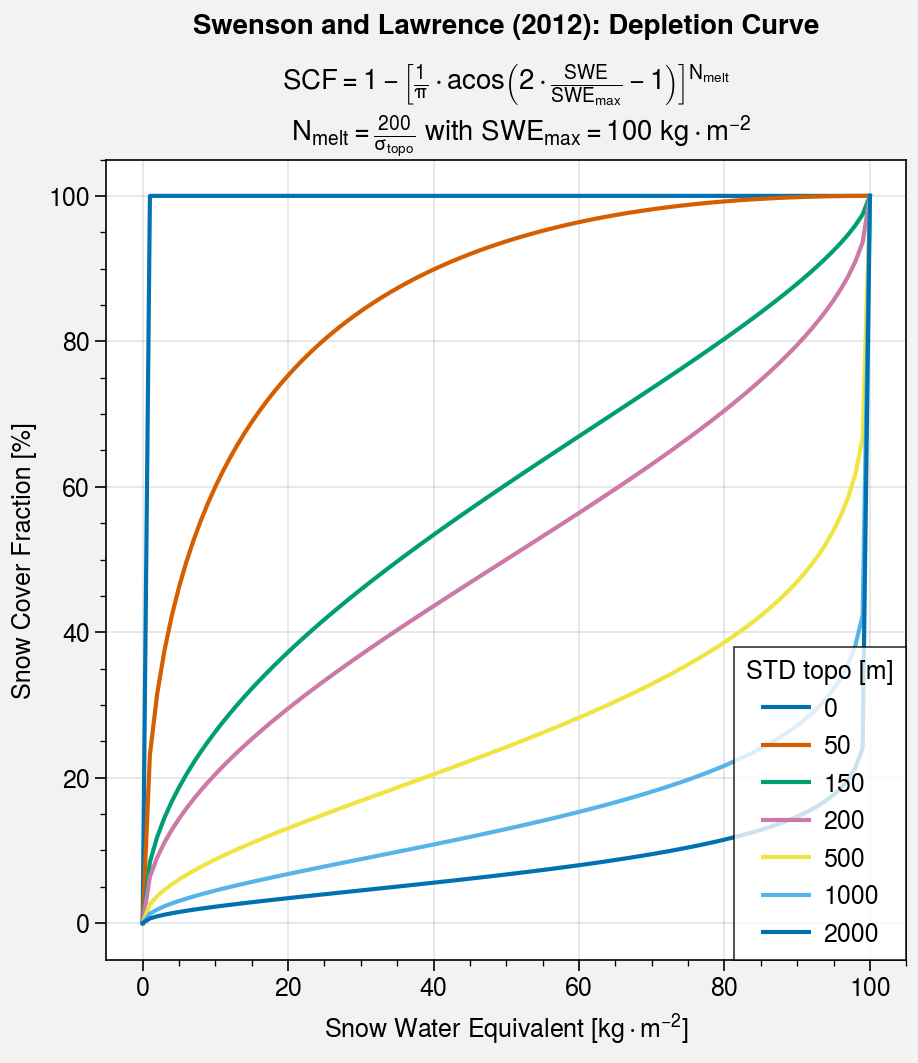

In [14]:
fig, axs = plot.subplots(nrows=1, ncols=1, axwidth=4)

SWE_max = 100
SWE = plot.arange(0, SWE_max, 1)
param = 'SL12'

k=0
hs = []
for sigma_topo in [0, 50, 150, 200, 500, 1000, 2000]:
    x = SWE
    y = u.scf(param=param, SWE=SWE, sigma_topo=sigma_topo, SWE_max=SWE_max)
    h = axs[k].plot(x, y, label=sigma_topo)
    hs.append(h)
axs[k].legend(hs, label='STD topo [m]', ncols=1, loc='lr')
axs.format(
    suptitle='Swenson and Lawrence (2012): Depletion Curve',
    title=
    r'''$ SCF = 1 - \left[\frac{1}{\pi} \cdot \operatorname{acos} \left(2 \cdot \frac{SWE}{SWE_{\max }} - 1\right)\right]^{N_{melt}}$
    $ N_{melt} = \frac{200}{\sigma_{topo}}$ with $SWE_{max} = $''' + str(SWE_max) + ' $kg \cdot m^{-2}$',
    xlabel='Snow Water Equivalent [$kg \cdot m^{-2}$]',
    ylabel='Snow Cover Fraction [%]'
)

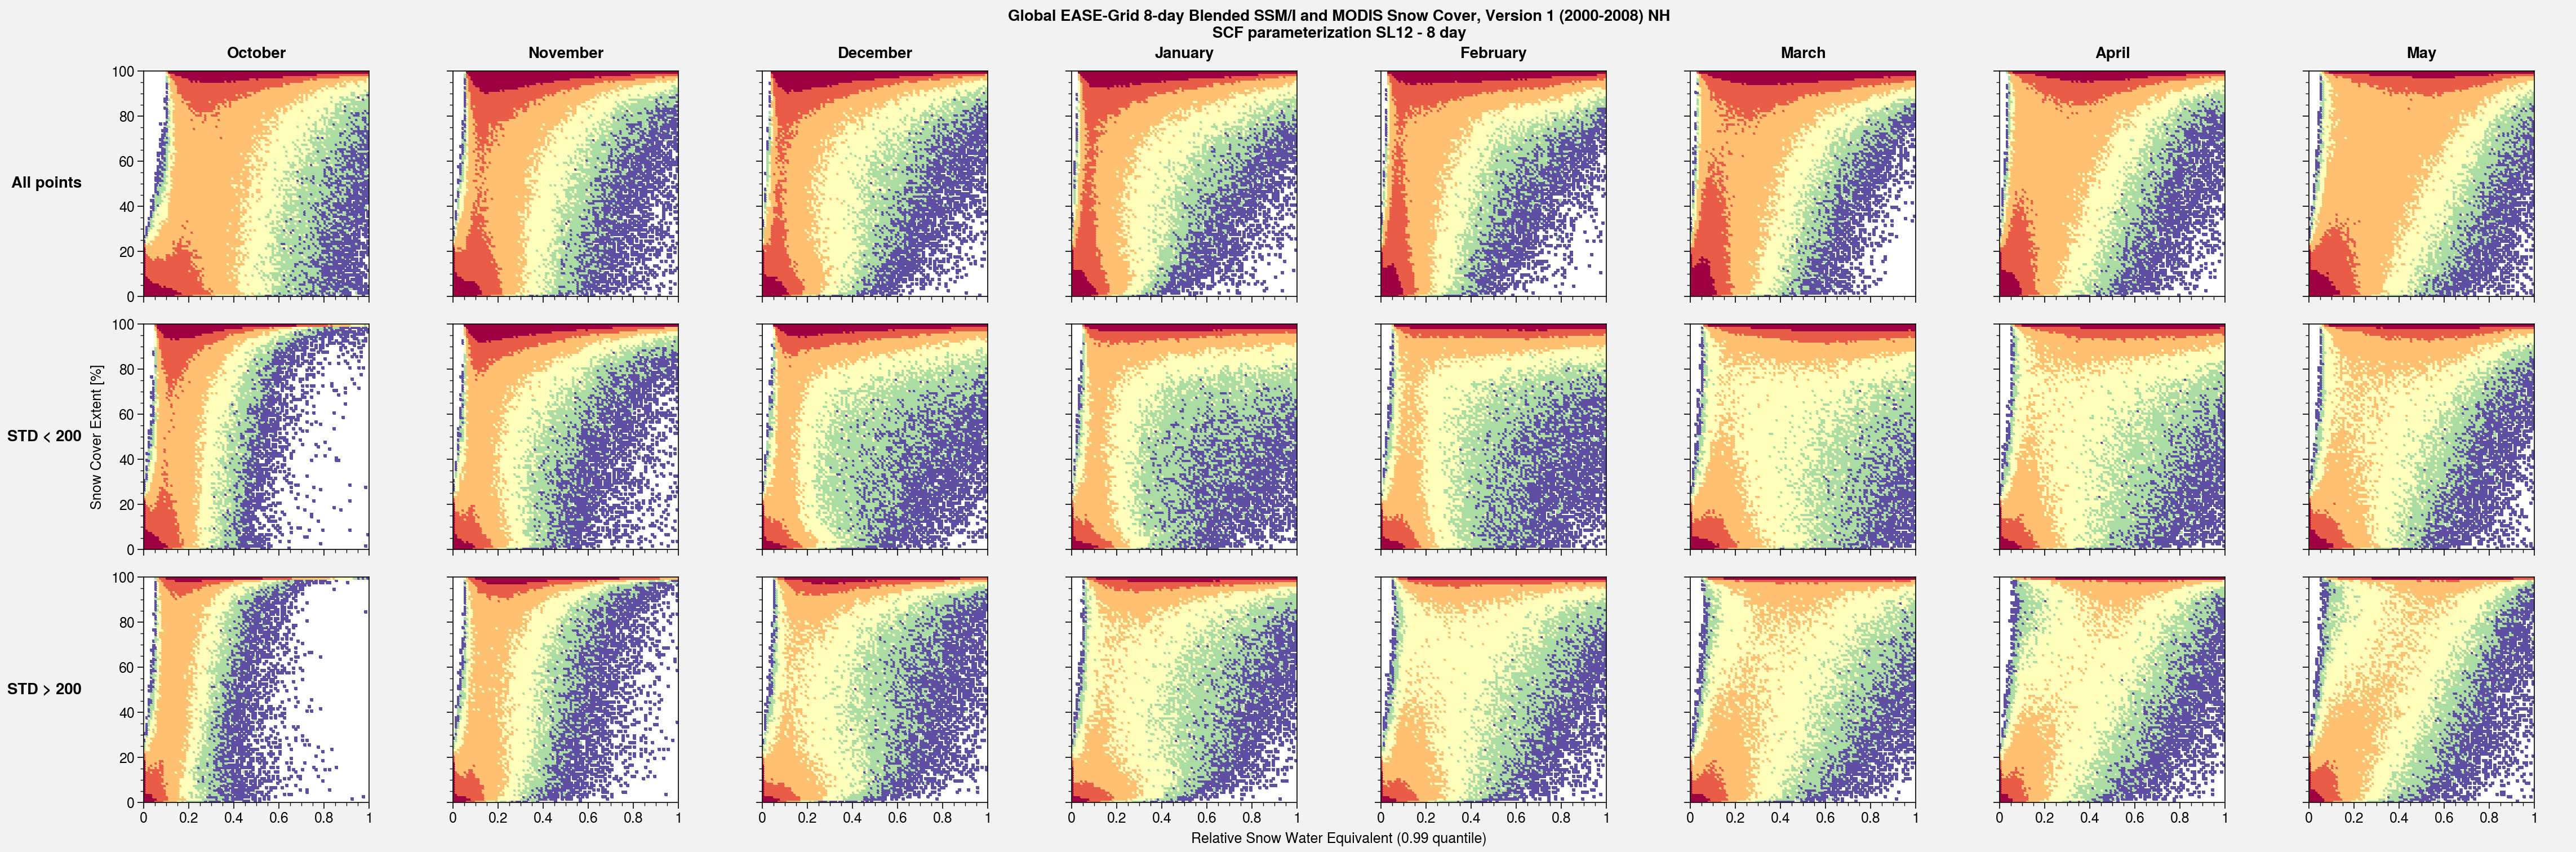

In [120]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])

lim_std = 200
SWE_max = 1 # relative

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 0.01)

# for domain in ['NH', 'NA', 'HMA']:
for domain in ['NH']:
    latlim, lonlim = u.get_zone(domain)

    # Figure
    fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)

    k = 0

    # All points
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True)
        swe_max = swe_raw.quantile(0.99)
        
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where(scf_regrid['time.month'] == month, drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1
        
    # STD < 200
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std < lim_std), drop=True)
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where((scf_regrid['time.month'] == month) & (std < lim_std), drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1
    # STD > 200
    for i, month in enumerate(months):
        swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std > lim_std), drop=True)
        swe_relative = swe_raw / swe_max
        
        axs[k].hist2d(
            swe_relative.values.flatten(), 
            scf_regrid.sel(lat=latlim, lon=lonlim).where((scf_regrid['time.month'] == month) & (std > lim_std), drop=True).values.flatten(), 
            bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
        )
        k += 1

    axs.format(
        collabels=[calendar.month_name[month] for month in months],
        rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
        xlabel='Relative Snow Water Equivalent (0.99 quantile)',
        ylabel='Snow Cover Extent [%]',
        suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                 '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                 'SCF parameterization '+param+' - 8 day'
    )


#     filename = 'EASE-Grid_SCF-SWE_relative_Oct-May_'+domain
#     for ext in ['jpg', 'png', 'pdf']:
#         fig.save('img/'+filename+'.'+ext)

/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarning: invalid value encountered in arccos
  scf = 1 - ( 1 / np.pi * np.arccos( 2 * SWE / SWE_max - 1 ) )**N_melt
/home/lalandmi/Dropbox/Thèse/notebooks/utils/param_SCF.py:90: RuntimeWarnin

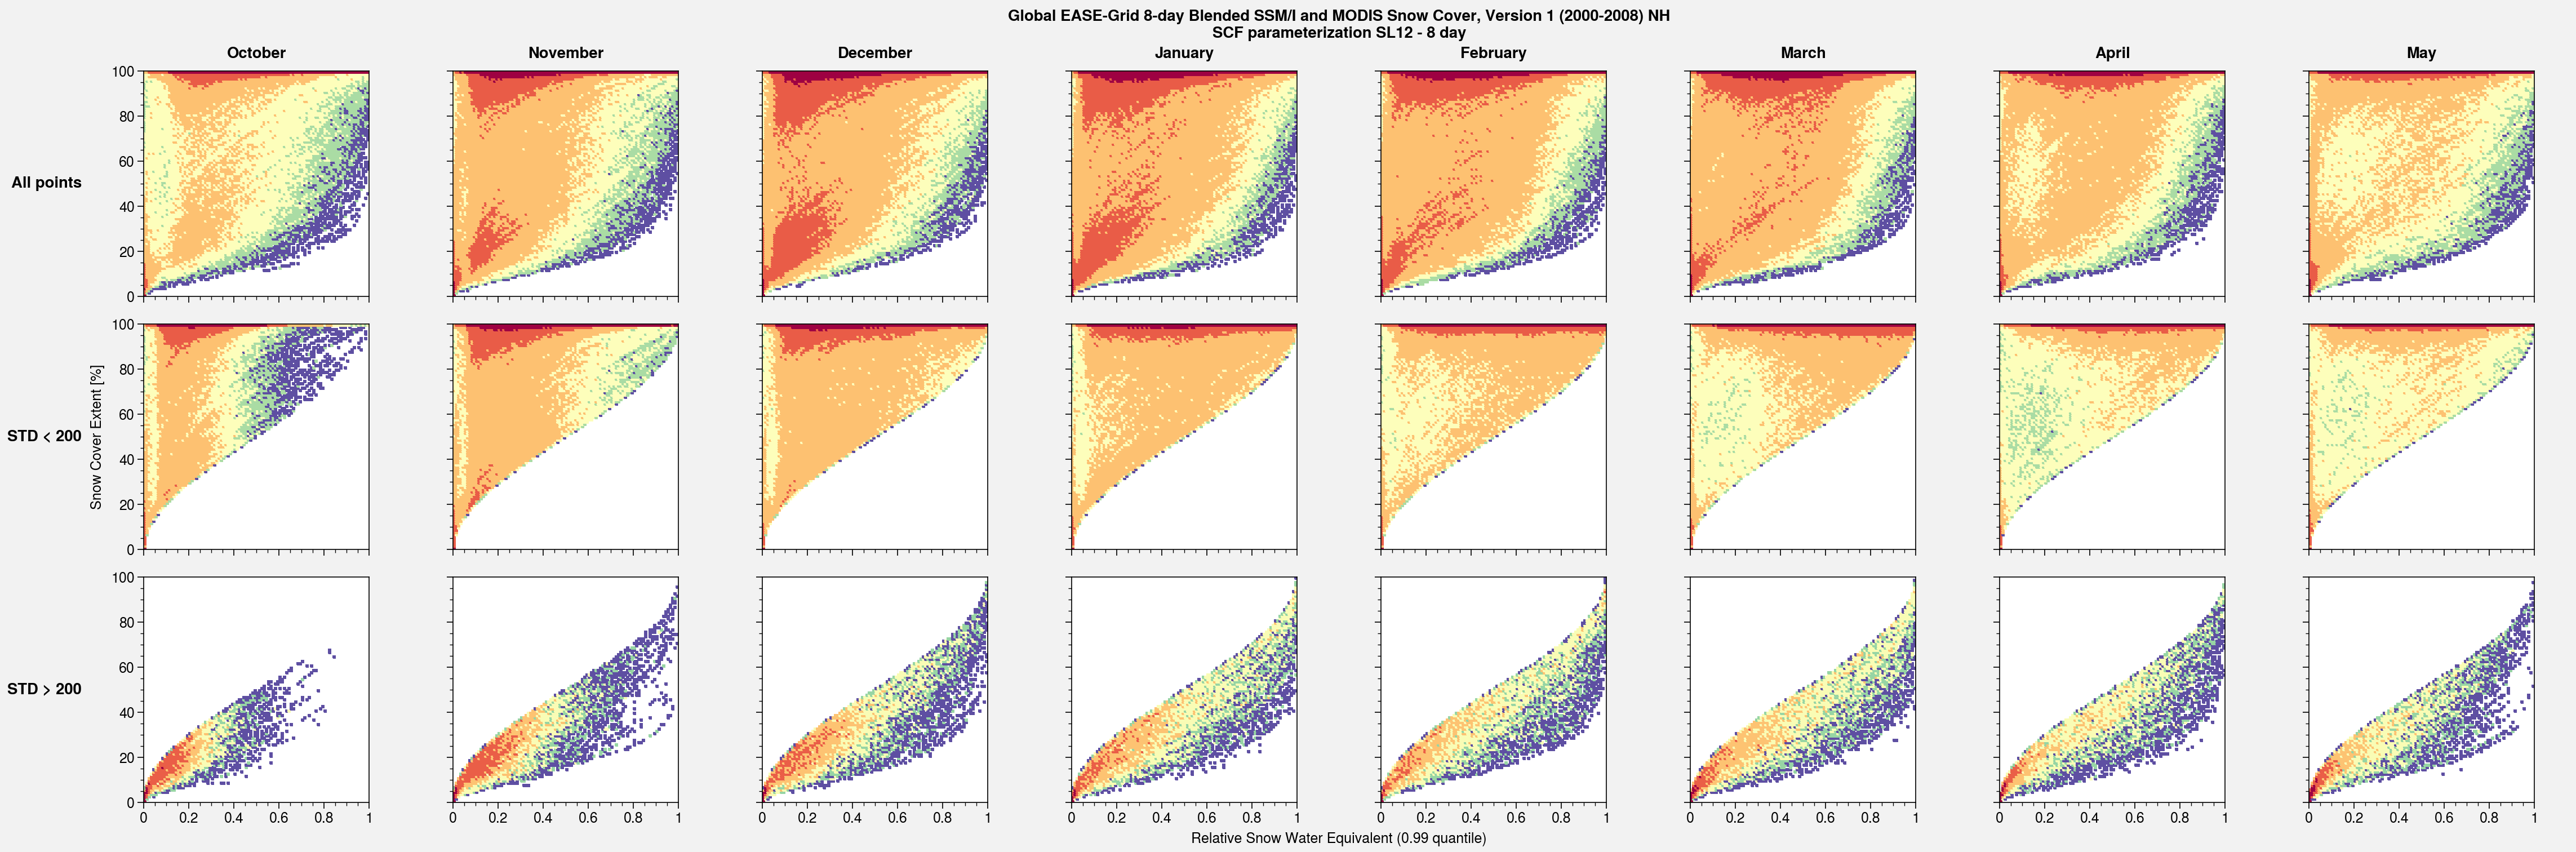

In [158]:
import calendar
months = np.array([10, 11, 12, 1, 2, 3, 4, 5])

lim_std = 200
SWE_max = 1 # relative

xylim = [[0, SWE_max], [0, 100]]
bins = 100
cmap = 'Spectral_r'
norm = 'log'
vmin=1
cmin=1

SWE = plot.arange(0, SWE_max, 0.01)

for param in ['SL12']:
    for domain in ['NH']:
        latlim, lonlim = u.get_zone(domain)

        # Figure
        fig, axs = plot.subplots(nrows=3, ncols=months.size, axwidth=2)

        k = 0

        # All points
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where(swe_regrid['time.month'] == month, drop=True)
            swe_max = swe_raw.quantile(0.99)

            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1

        # STD < 200
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std < lim_std), drop=True)
            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1
        # STD > 200
        for i, month in enumerate(months):
            swe_raw = swe_regrid.sel(lat=latlim, lon=lonlim).where((swe_regrid['time.month'] == month) & (std > lim_std), drop=True)
            swe_relative = swe_raw / swe_max

            axs[k].hist2d(
                swe_relative.values.flatten(), 
                u.scf(param=param, SWE=swe_relative.values.flatten(), sigma_topo=std.where(swe_relative >= 0).values.flatten(), SWE_max=1), 
                bins=bins, range=xylim, cmap=cmap, norm=norm, vmin=vmin, cmin=cmin
            )
            k += 1

        axs.format(
            collabels=[calendar.month_name[month] for month in months],
            rowlabels=['All points', 'STD < '+str(lim_std), 'STD > '+str(lim_std)],
            xlabel='Relative Snow Water Equivalent (0.99 quantile)',
            ylabel='Snow Cover Extent [%]',
            suptitle='Global EASE-Grid 8-day Blended SSM/I and MODIS Snow Cover, Version 1 ' \
                     '('+str(ds.time['time.year'][0].values)+'-'+str(ds.time['time.year'][-1].values)+') ' + domain + '\n' \
                     'SCF parameterization '+param+' - 8 day'
        )


    #     filename = 'EASE-Grid_SCF-SWE_relative_Oct-May_'+domain
    #     for ext in ['jpg', 'png', 'pdf']:
    #         fig.save('img/'+filename+'.'+ext)

# Machine Learning

- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://www.tensorflow.org/tutorials/keras/regression

In [12]:
# Machine Learning
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/h

In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

1.14.0


In [37]:
ds = scf_regrid.where(scf_regrid > 0).to_dataset()
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 355)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-05 2000-03-13 ... 2008-01-17
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
Data variables:
    SCA      (time, lat, lon) float64 dask.array<chunksize=(37, 720, 1440), meta=np.ndarray>

In [38]:
ds['SWE'] = swe_regrid.where(swe_regrid > 0)
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 355)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-05 2000-03-13 ... 2008-01-17
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
Data variables:
    SCA      (time, lat, lon) float64 dask.array<chunksize=(37, 720, 1440), meta=np.ndarray>
    SWE      (time, lat, lon) float64 dask.array<chunksize=(37, 720, 1440), meta=np.ndarray>

In [39]:
ds['STD'] = std
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 355)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-05 2000-03-13 ... 2008-01-17
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
Data variables:
    SCA      (time, lat, lon) float64 dask.array<chunksize=(37, 720, 1440), meta=np.ndarray>
    SWE      (time, lat, lon) float64 dask.array<chunksize=(37, 720, 1440), meta=np.ndarray>
    STD      (lat, lon) int16 ...

In [40]:
df = ds.to_dataframe()

In [41]:
df_clean = df.dropna()
df_clean

SCA        SWE  STD
lat    lon      time                                 
24.125  90.625  2004-04-06   1.856272  43.313023    3
        102.375 2005-03-14   0.179126   0.204716  182
24.375  90.375  2004-04-22   1.855957  13.225986    4
        90.625  2004-04-06   1.315509  30.695203    2
        91.375  2004-03-29   0.242918  10.931290    3
...                               ...        ...  ...
82.375 -62.625  2007-08-13   3.135567  19.533228  166
                2007-08-29  99.019553  41.847668  166
                2007-09-06  99.992257  56.563828  166
                2007-09-14  99.992257  39.606574  166
                2007-09-22  99.466404  41.962864  166

[14025332 rows x 3 columns]

In [42]:
df_clean.reset_index(inplace=True)
df_clean

lat      lon       time        SCA        SWE  STD
0         24.125   90.625 2004-04-06   1.856272  43.313023    3
1         24.125  102.375 2005-03-14   0.179126   0.204716  182
2         24.375   90.375 2004-04-22   1.855957  13.225986    4
3         24.375   90.625 2004-04-06   1.315509  30.695203    2
4         24.375   91.375 2004-03-29   0.242918  10.931290    3
...          ...      ...        ...        ...        ...  ...
14025327  82.375  -62.625 2007-08-13   3.135567  19.533228  166
14025328  82.375  -62.625 2007-08-29  99.019553  41.847668  166
14025329  82.375  -62.625 2007-09-06  99.992257  56.563828  166
14025330  82.375  -62.625 2007-09-14  99.992257  39.606574  166
14025331  82.375  -62.625 2007-09-22  99.466404  41.962864  166

[14025332 rows x 6 columns]

In [57]:
df_subset = df_clean[:1000000]

In [58]:
df_subset['month'] = pd.DatetimeIndex(df_subset['time']).month
df_subset

/home/lalandmi/miniconda3/envs/phd_ml_v0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


lat      lon       time        SCA        SWE  STD  month
0       24.125   90.625 2004-04-06   1.856272  43.313023    3      4
1       24.125  102.375 2005-03-14   0.179126   0.204716  182      3
2       24.375   90.375 2004-04-22   1.855957  13.225986    4      4
3       24.375   90.625 2004-04-06   1.315509  30.695203    2      4
4       24.375   91.375 2004-03-29   0.242918  10.931290    3      3
...        ...      ...        ...        ...        ...  ...    ...
999995  37.125   86.625 2004-10-23   2.271708  11.312943  207     10
999996  37.125   86.625 2004-11-08   4.305075   5.568207  207     11
999997  37.125   86.625 2004-11-16   1.460757   1.409616  207     11
999998  37.125   86.625 2004-11-24  97.008476  15.195629  207     11
999999  37.125   86.625 2004-12-02  46.315996  22.468602  207     12

[1000000 rows x 7 columns]

In [59]:
train_dataset = df_subset.sample(frac=0.8, random_state=0)
train_dataset

lat     lon       time        SCA        SWE  STD  month
157105  29.625  99.125 2002-05-01  29.025692  38.619203  710      5
374554  32.375  85.875 2001-11-25   0.404773   8.095456  185     11
688694  34.875  97.875 2000-12-26  10.069089   0.196520   59     12
265381  31.125  79.125 2000-09-05  16.527057  23.295285  615      9
955415  36.875  69.875 2003-03-22   4.192735   5.444630  363      3
...        ...     ...        ...        ...        ...  ...    ...
847316  36.125  70.125 2003-08-21   4.879288   4.566509  835      8
20694   27.375  88.625 2002-11-09   6.903383  30.545443  847     11
7586    26.875  87.125 2006-05-09   0.482125  24.588368  368      5
263626  31.125  77.625 2003-01-17   4.868348  19.235474  360      1
68766   28.125  99.625 2002-01-01   2.934010  10.914638  330      1

[800000 rows x 7 columns]

In [60]:
test_dataset = df_subset.drop(train_dataset.index)
test_dataset

lat      lon       time        SCA        SWE  STD  month
1       24.125  102.375 2005-03-14   0.179126   0.204716  182      3
4       24.375   91.375 2004-03-29   0.242918  10.931290    3      3
15      24.625   91.375 2007-04-15   2.188033   7.556613    2      4
22      24.875   90.125 2007-04-23   0.245134   3.922137    2      4
26      24.875   90.375 2007-04-23   0.415824   5.666904    2      4
...        ...      ...        ...        ...        ...  ...    ...
999977  37.125   86.625 2003-11-17   1.077829   3.289311  207     11
999983  37.125   86.625 2004-02-02   2.969329  23.073066  207      2
999984  37.125   86.625 2004-02-10  11.867113  25.989100  207      2
999986  37.125   86.625 2004-02-26   1.323482  14.578491  207      2
999996  37.125   86.625 2004-11-08   4.305075   5.568207  207     11

[200000 rows x 7 columns]

In [61]:
import seaborn as sns

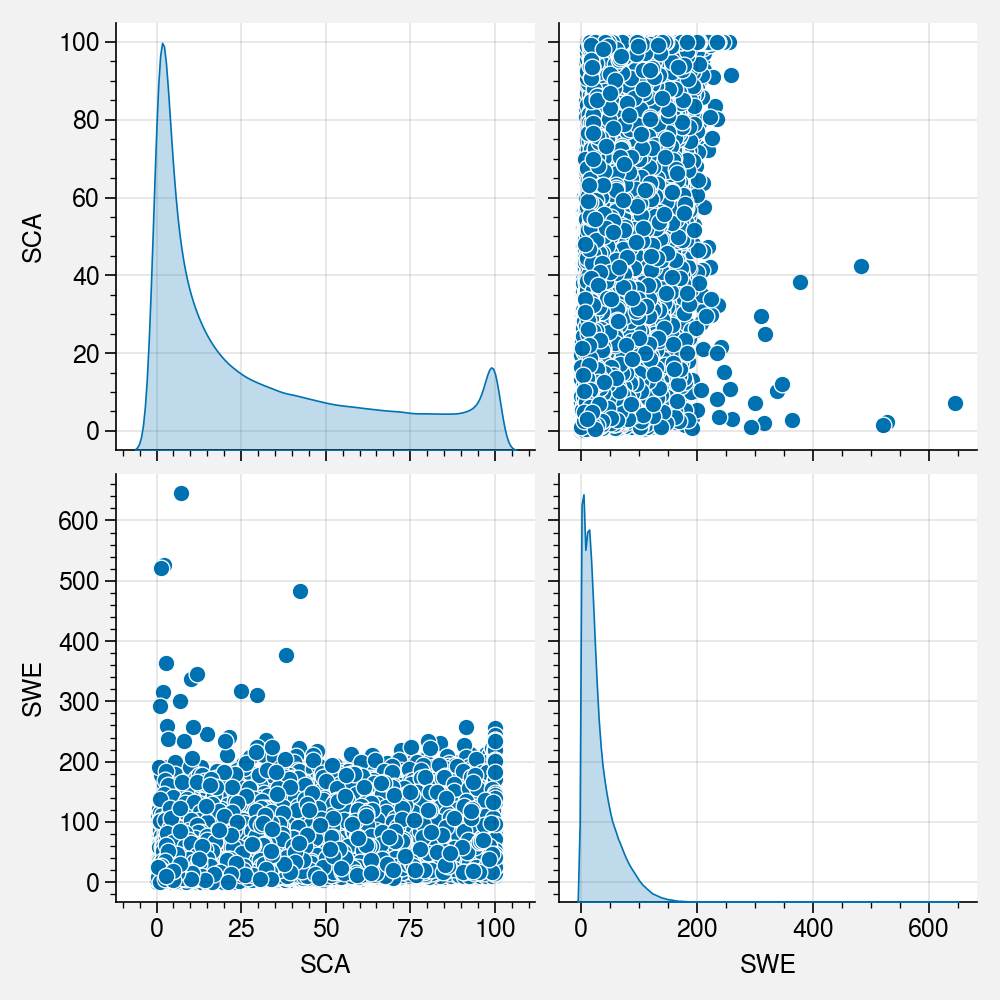

In [62]:
sns.pairplot(train_dataset[['SCA', 'SWE']], diag_kind='kde')

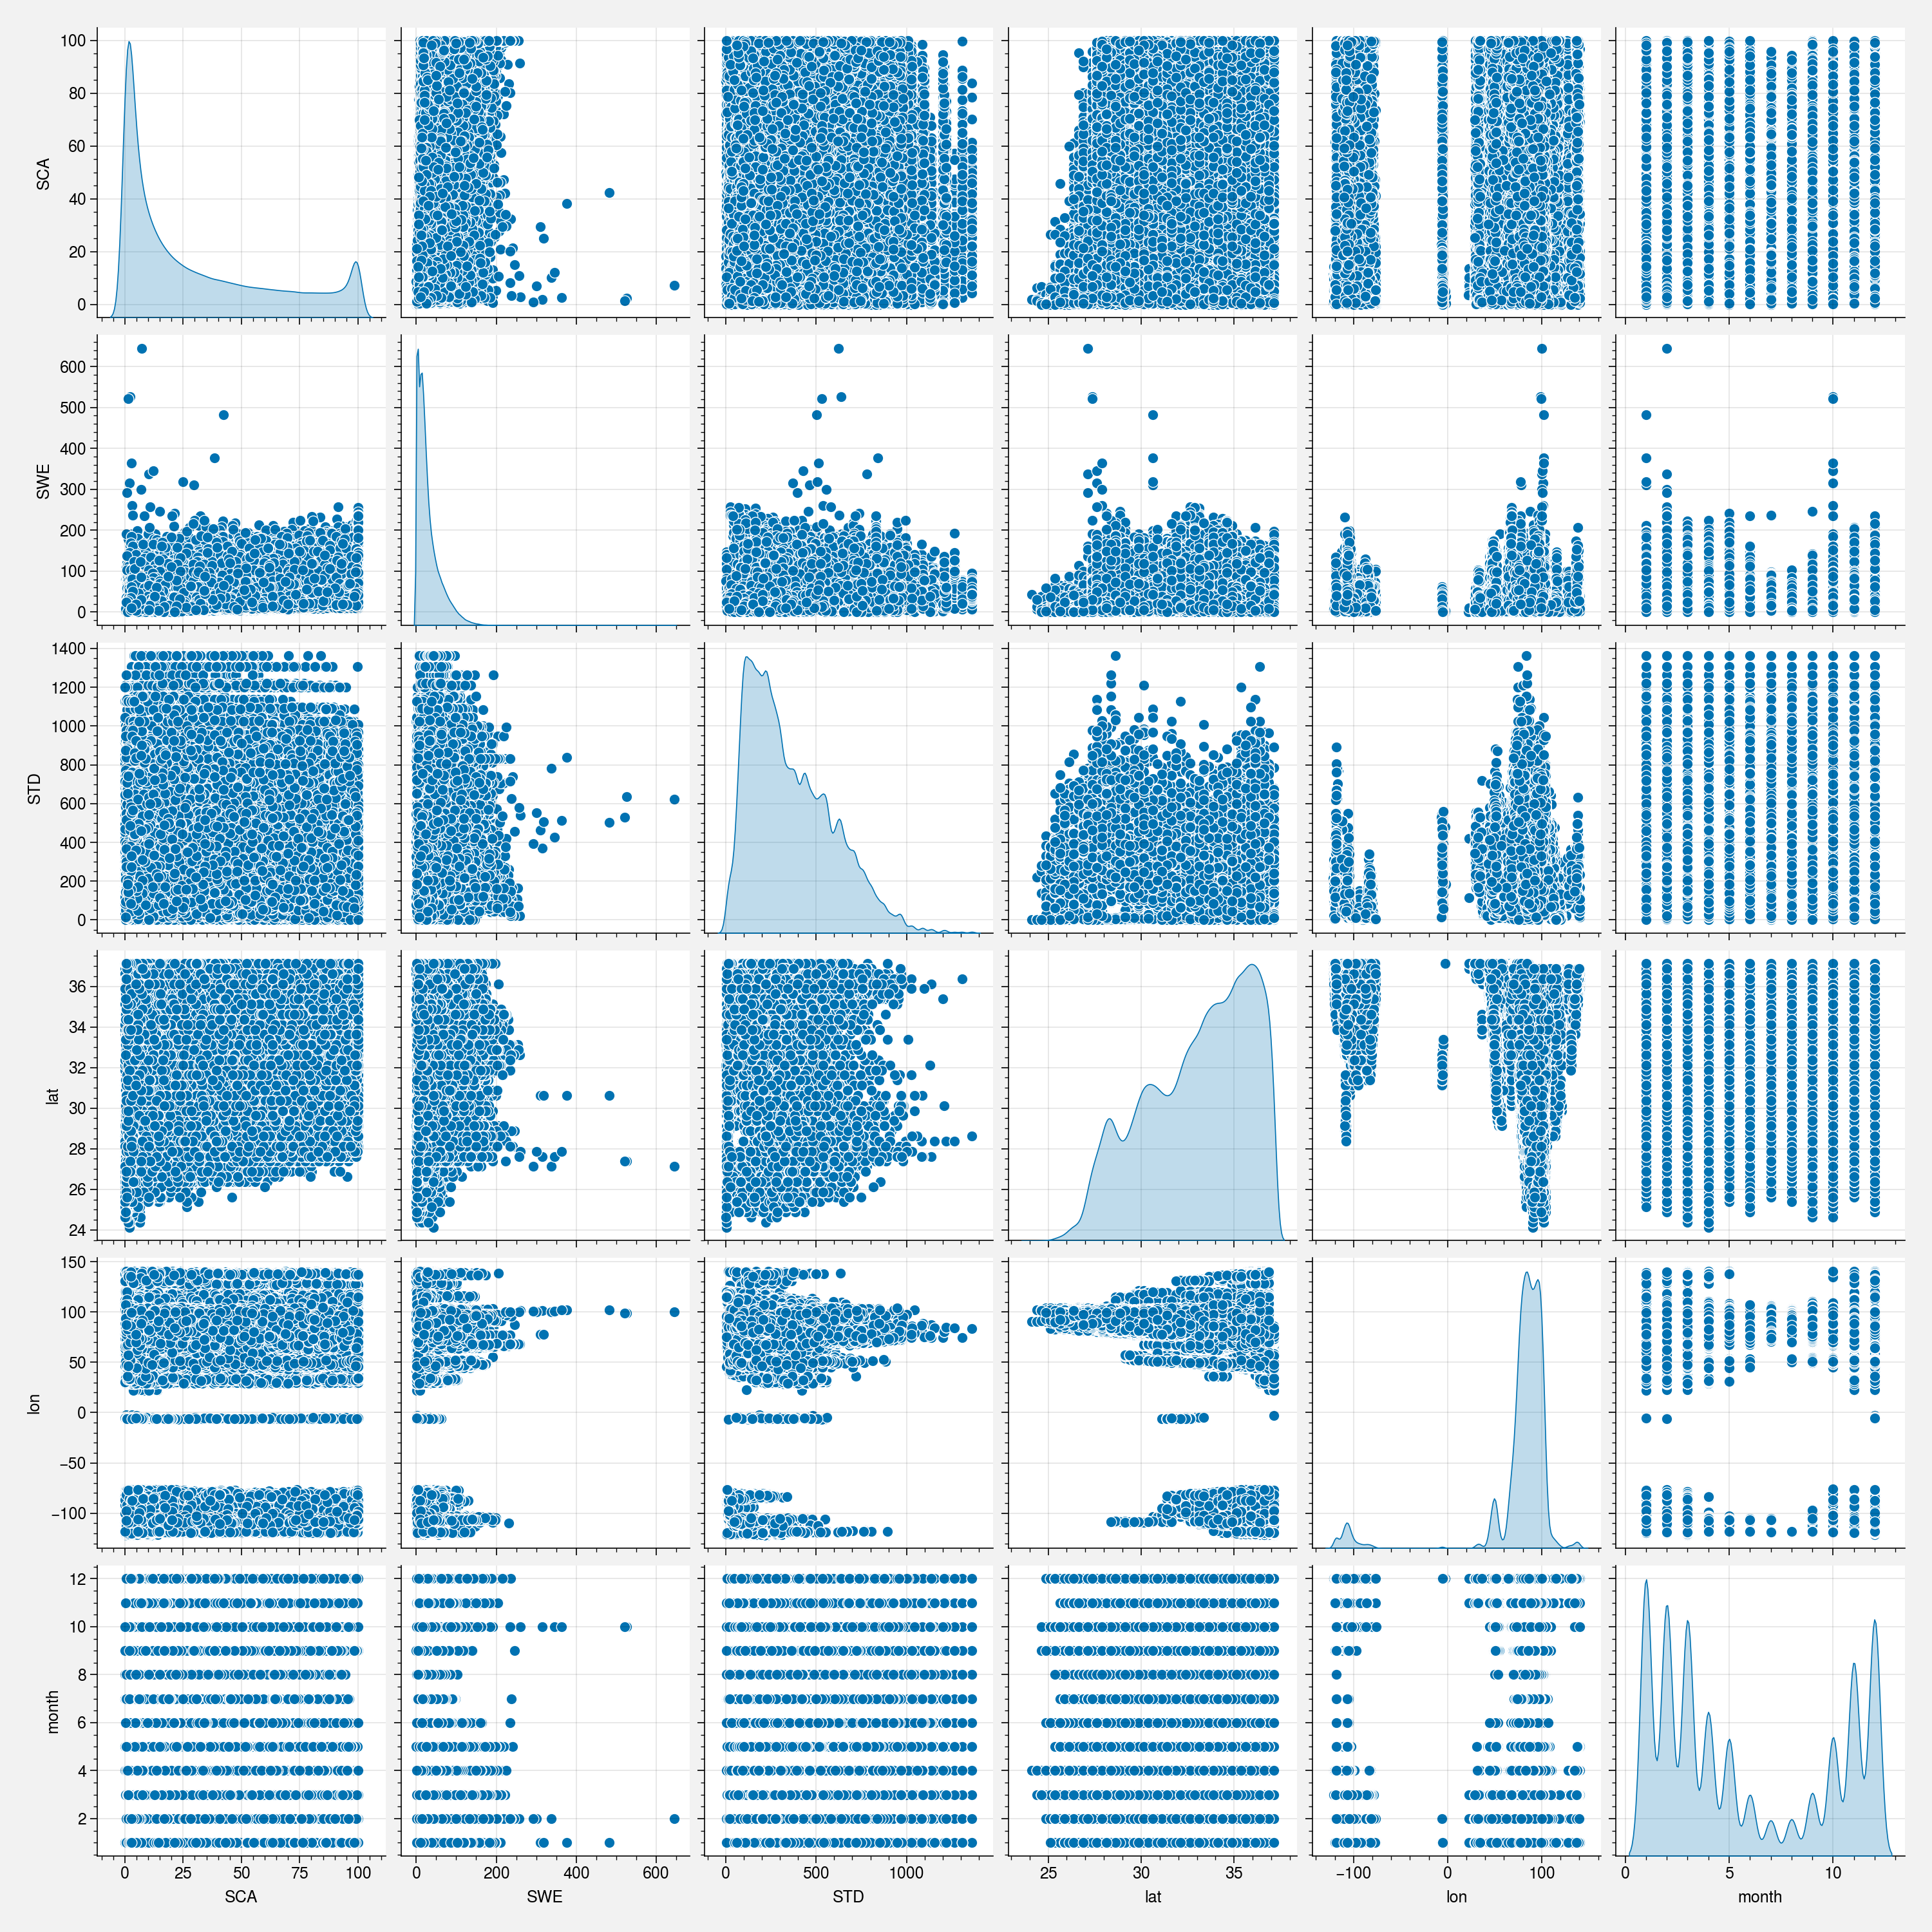

In [63]:
sns.pairplot(train_dataset[['SCA', 'SWE', 'STD', 'lat', 'lon', 'month']], diag_kind='kde')

In [64]:
train_dataset.describe().transpose()

count        mean         std         min         25%         50%  \
lat    800000.0   33.021491    2.804236   24.125000   30.875000   33.375000   
lon    800000.0   76.501774   42.100917 -121.625000   76.375000   85.375000   
SCA    800000.0   30.750119   31.651160    0.000006    3.848100   17.714464   
SWE    800000.0   29.239622   28.613327    0.000046    8.993432   20.077502   
STD    800000.0  360.109623  231.431735    1.000000  172.000000  306.000000   
month  800000.0    5.806820    4.096631    1.000000    2.000000    4.000000   

              75%          max  
lat     35.375000    37.125000  
lon     94.875000   140.625000  
SCA     52.311080   100.000000  
SWE     40.547655   644.920679  
STD    518.000000  1362.000000  
month   10.000000    12.000000

In [65]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SCA')
test_labels = test_features.pop('SCA')

In [66]:
train_dataset.describe().transpose()[['mean', 'std']]

mean         std
lat     33.021491    2.804236
lon     76.501774   42.100917
SCA     30.750119   31.651160
SWE     29.239622   28.613327
STD    360.109623  231.431735
month    5.806820    4.096631

In [76]:
train_dataset

lat     lon        SCA        SWE  STD  month
157105  29.625  99.125  29.025692  38.619203  710      5
374554  32.375  85.875   0.404773   8.095456  185     11
688694  34.875  97.875  10.069089   0.196520   59     12
265381  31.125  79.125  16.527057  23.295285  615      9
955415  36.875  69.875   4.192735   5.444630  363      3
...        ...     ...        ...        ...  ...    ...
847316  36.125  70.125   4.879288   4.566509  835      8
20694   27.375  88.625   6.903383  30.545443  847     11
7586    26.875  87.125   0.482125  24.588368  368      5
263626  31.125  77.625   4.868348  19.235474  360      1
68766   28.125  99.625   2.934010  10.914638  330      1

[800000 rows x 6 columns]

In [75]:
train_dataset.drop(columns=['time'])

KeyError: "['time'] not found in axis"

In [79]:
train_dataset_normalized = (train_dataset - train_dataset.mean())/train_dataset.std()

In [140]:
model = tf.keras.Sequential([
    layers.Dense(units=6, input_dim=5, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1),
    
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 4         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [90]:
train_features.SWE

157105    38.619203
374554     8.095456
688694     0.196520
265381    23.295285
955415     5.444630
            ...    
847316     4.566509
20694     30.545443
7586      24.588368
263626    19.235474
68766     10.914638
Name: SWE, Length: 800000, dtype: float64

In [108]:
train_features.SWE[:10]

157105    38.619203
374554     8.095456
688694     0.196520
265381    23.295285
955415     5.444630
4280       7.833247
514674    14.372625
800352     6.653606
94727     43.548581
753889    10.876227
Name: SWE, dtype: float64

In [116]:
train_features = train_features.drop(columns='time')

In [117]:
train_features

lat     lon        SWE  STD  month
157105  29.625  99.125  38.619203  710      5
374554  32.375  85.875   8.095456  185     11
688694  34.875  97.875   0.196520   59     12
265381  31.125  79.125  23.295285  615      9
955415  36.875  69.875   5.444630  363      3
...        ...     ...        ...  ...    ...
847316  36.125  70.125   4.566509  835      8
20694   27.375  88.625  30.545443  847     11
7586    26.875  87.125  24.588368  368      5
263626  31.125  77.625  19.235474  360      1
68766   28.125  99.625  10.914638  330      1

[800000 rows x 5 columns]

In [118]:
model.predict(train_features[:10])

array([[0.0000000e+00],
       [9.5310730e-01],
       [9.7641909e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.3709068e-05],
       [9.8597729e-01],
       [9.9821413e-01],
       [0.0000000e+00],
       [9.9620795e-01]], dtype=float32)

In [141]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
train_features_

In [128]:
train_features

lat     lon        SWE  STD  month
157105  29.625  99.125  38.619203  710      5
374554  32.375  85.875   8.095456  185     11
688694  34.875  97.875   0.196520   59     12
265381  31.125  79.125  23.295285  615      9
955415  36.875  69.875   5.444630  363      3
...        ...     ...        ...  ...    ...
847316  36.125  70.125   4.566509  835      8
20694   27.375  88.625  30.545443  847     11
7586    26.875  87.125  24.588368  368      5
263626  31.125  77.625  19.235474  360      1
68766   28.125  99.625  10.914638  330      1

[800000 rows x 5 columns]

In [142]:
%%time
history = model.fit(
    (train_features - train_features.mean())/train_features.std(), train_labels,
    epochs=10, #100
    # suppress logging
#     verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 640000 samples, validate on 160000 samples
Epoch 1/10
640000/640000 [==============================] - 17s 26us/sample - loss: 17.9379 - val_loss: 17.1308
Epoch 2/10
640000/640000 [==============================] - 16s 24us/sample - loss: 17.1423 - val_loss: 17.0768
Epoch 3/10
640000/640000 [==============================] - 16s 25us/sample - loss: 17.0285 - val_loss: 16.9008
Epoch 4/10
640000/640000 [==============================] - 16s 25us/sample - loss: 16.9044 - val_loss: 16.8530
Epoch 5/10
640000/640000 [==============================] - 16s 25us/sample - loss: 16.8653 - val_loss: 16.8313
Epoch 6/10
640000/640000 [==============================] - 17s 27us/sample - loss: 16.8478 - val_loss: 16.8264
Epoch 7/10
640000/640000 [==============================] - 17s 26us/sample - loss: 16.8356 - val_loss: 16.8156
Epoch 8/10
640000/640000 [==============================] - 17s 27us/sample - loss: 16.8276 - val_loss: 16.8046
Epoch 9/10
640000/640000 [==========================

In [143]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss   val_loss  epoch
5  16.847780  16.826364      5
6  16.835585  16.815574      6
7  16.827648  16.804586      7
8  16.820964  16.799285      8
9  16.815142  16.795088      9

In [103]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
#     plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

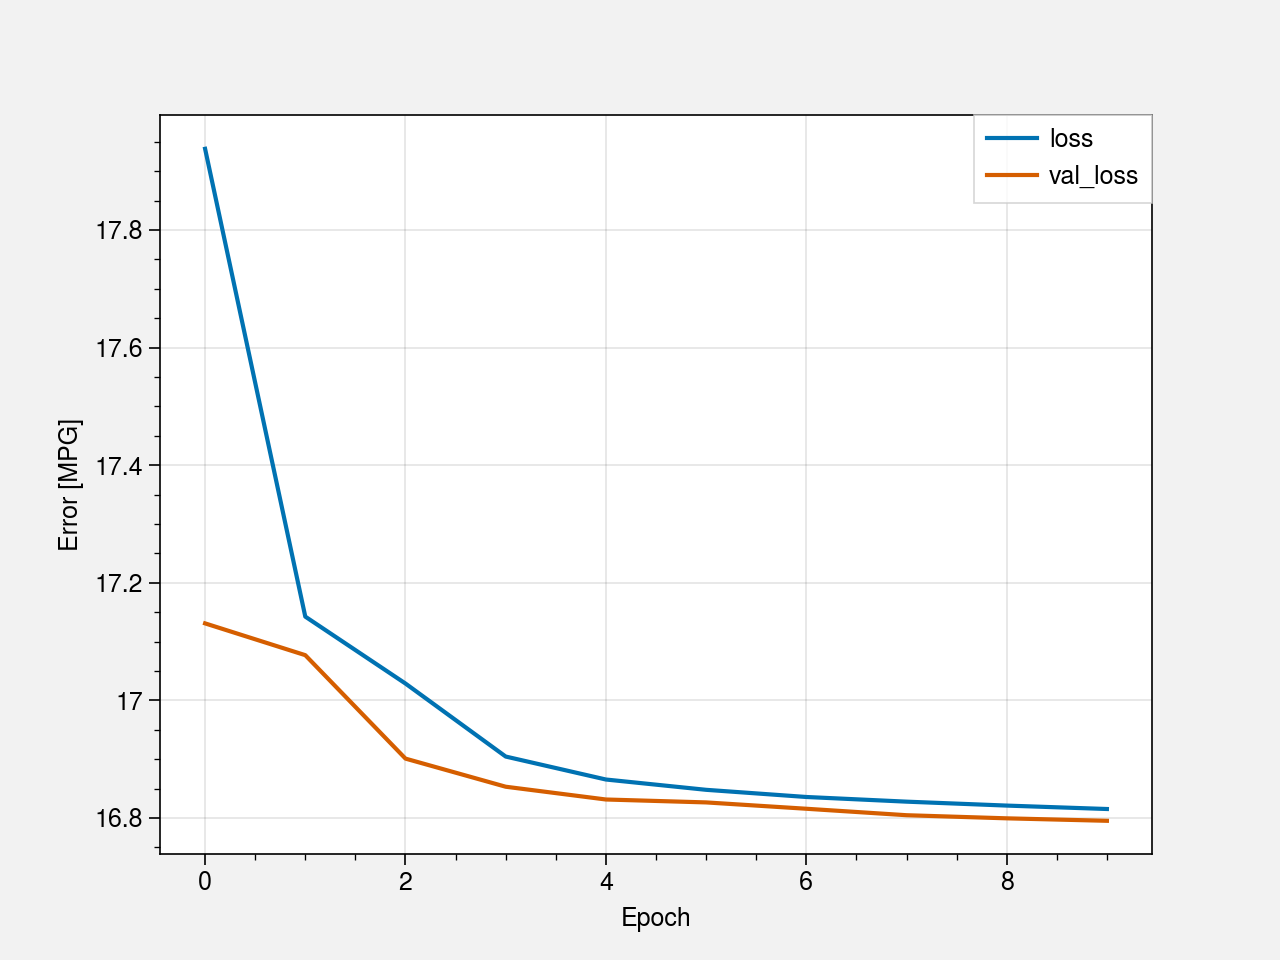

In [144]:
plot_loss(history)

In [127]:
train_labels[:10]

157105    29.025692
374554     0.404773
688694    10.069089
265381    16.527057
955415     4.192735
4280       3.039653
514674     2.874525
800352    14.734816
94727     49.116628
753889    10.765990
Name: SCA, dtype: float64

In [125]:
train_features[:10]

lat      lon        SWE  STD  month
157105  29.625   99.125  38.619203  710      5
374554  32.375   85.875   8.095456  185     11
688694  34.875   97.875   0.196520   59     12
265381  31.125   79.125  23.295285  615      9
955415  36.875   69.875   5.444630  363      3
4280    26.375   97.375   7.833247  277     12
514674  33.625   82.625  14.372625  154     10
800352  35.625  136.375   6.653606  220      3
94727   28.625   93.125  43.548581  453     12
753889  35.375   88.375  10.876227  127      3

In [145]:
model.predict(train_features[:10])

array([[73.37317  ],
       [ 4.1586027],
       [ 4.1586027],
       [75.8469   ],
       [23.271603 ],
       [ 4.1586027],
       [ 4.1586027],
       [ 4.1586027],
       [ 4.1586027],
       [ 4.1586027]], dtype=float32)